In [1]:
import requests
import pandas as pd
import io
import yfinance as yf
from datetime import datetime, timedelta
import pytz
import tkinter as tk
from tkinter import ttk
from tkinter import *

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(data, column, window):
    return data[column].ewm(span=window, adjust=False, min_periods=window).mean()

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './formatted_stock_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create the GUI window
root = tk.Tk()
root.title("Stock Analysis")

# Create the Treeview widget
tree = ttk.Treeview(root)
tree["columns"] = ("Price", "25-day MA", "44-day MA", "200-day MA", "25-day EMA", "44-day EMA", "52-wk Low", "52-wk High")

# Define the column headings
tree.heading("#0", text="Symbol")
tree.heading("Price", text="Price")
tree.heading("25-day MA", text="25-day MA")
tree.heading("44-day MA", text="44-day MA")
tree.heading("200-day MA", text="200-day MA")
tree.heading("25-day EMA", text="25-day EMA")
tree.heading("44-day EMA", text="44-day EMA")
tree.heading("52-wk Low", text="52-wk Low")
tree.heading("52-wk High", text="52-wk High")

# Thresholds for filters
moving_avg_threshold = 0.5  # You can adjust this threshold
ema_threshold = 0.5  # You can adjust this threshold

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    # Your code for each symbol
    try:
        print("Analyzing stock:", ticker_symbol)

        # error handling to remove Jio Financial Services
        if ticker_symbol == 'ITC.NS':
            continue

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the moving averages
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()
        historical_data["44MA"] = historical_data["Close"].rolling(window=44).mean()
        historical_data["200MA"] = historical_data["Close"].rolling(window=200).mean()

        # Calculate the Exponential Moving Averages (EMA)
        historical_data["25EMA"] = calculate_ema(historical_data, "Close", 25)
        historical_data["44EMA"] = calculate_ema(historical_data, "Close", 44)

        # Check if 25-day and 44-day EMAs are close
        is_close_emas = (
            abs(historical_data["25EMA"].iloc[-1] - historical_data["44EMA"].iloc[-1]) < ema_threshold
        )

        # Check if 200-day and 44-day SMAs are close
        is_close_smas = (
            abs(historical_data["200MA"].iloc[-1] - historical_data["44MA"].iloc[-1]) < moving_avg_threshold
        )

        # Calculate 52-week low and high based on available data
        low_52_weeks = historical_data["Low"].min()
        high_52_weeks = historical_data["High"].max()

        # Store the results for the current symbol if filters are met
        if is_close_emas and is_close_smas:
            latest_price = historical_data.iloc[-1]["Close"]
            latest_25ma = historical_data.iloc[-1]["25MA"]
            latest_44ma = historical_data.iloc[-1]["44MA"]
            latest_200ma = historical_data.iloc[-1]["200MA"]
            latest_25ema = historical_data.iloc[-1]["25EMA"]
            latest_44ema = historical_data.iloc[-1]["44EMA"]

            # Update the Treeview with the results for the current symbol
            tree.insert("", "end", text=ticker_symbol, values=(
                latest_price, latest_25ma, latest_44ma, latest_200ma, latest_25ema, latest_44ema, low_52_weeks, high_52_weeks))
    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Pack the Treeview into the GUI
tree.pack(expand=YES, fill=BOTH)

# Start the Tkinter main loop
root.mainloop()


Analyzing stock: AAVAS.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AFFLE.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock: BLS.NS
Analyzing stock: BSE.NS
Analyzing stock: BALAMINES.NS
Analyzing stock: BALRAMCHIN.NS
Analyzing stock: BIKAJI.NS
Analyzing stock: BIRLACORPN.NS
Analyzing stock: BSOFT.NS
Analyzing stock: CESC.NS
Analyzing stock: CIEINDIA.NS
Analyzing stock: CAMPUS.NS
Analyzing stock: CANFINHOME.NS
Analyzing stock: CEATLTD.NS
Analyzing stock: CENTRALBK.NS
Analyzing stock: CDSL.NS
Analyzing stock: CENTURYTEX.NS
Analyzing stock: CHAMBLFERT.NS
Analyzing stock: CUB.NS
Analyzing stock: COCHINSHIP.NS
Analyzing stock: CAMS.NS
Analyzing stock: CREDITACC.NS
Analyzing stock: CYIENT.NS
Analyzing stock: DATAPATTNS.NS
Analyzing stock: DEEPAKFERT.NS
Analyzing stock: EASEMYTRIP.NS
Analyzing stock: ELGIEQUIP.NS
Analyzing stock: EQUITASBNK.NS
Analyzing stock: EXIDEIND.NS
Analyzing s

In [6]:
import requests
import pandas as pd
import io
import yfinance as yf
from datetime import datetime, timedelta
import pytz
import tkinter as tk
from tkinter import ttk
from tkinter import *

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(data, column, window):
    return data[column].ewm(span=window, adjust=False, min_periods=window).mean()

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './formatted_stock_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create the GUI window
root = tk.Tk()
root.title("Stock Analysis")

# Create the Treeview widget
tree = ttk.Treeview(root)
tree["columns"] = ("Price", "25-day MA", "44-day MA", "200-day MA", "25-day EMA", "44-day EMA", "52-wk Low", "52-wk High")

# Define the column headings
tree.heading("#0", text="Symbol")
tree.heading("Price", text="Price")
tree.heading("25-day MA", text="25-day MA")
tree.heading("44-day MA", text="44-day MA")
tree.heading("200-day MA", text="200-day MA")
tree.heading("25-day EMA", text="25-day EMA")
tree.heading("44-day EMA", text="44-day EMA")
tree.heading("52-wk Low", text="52-wk Low")
tree.heading("52-wk High", text="52-wk High")

# Thresholds for filters
moving_avg_threshold = 0.5  # You can adjust this threshold
ema_threshold = 0.5  # You can adjust this threshold

# Create three separate lists for filtered stocks based on conditions
list_1 = []  # Close price falls 15-20% below the 25-day moving average
list_2 = []  # Close price falls 15-20% below the 44-day moving average
list_3 = []  # Close price falls 25-30% below the 200-day moving average

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # error handling to remove Jio Financial Services
        if ticker_symbol == 'ITC.NS':
            continue

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the moving averages
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()
        historical_data["44MA"] = historical_data["Close"].rolling(window=44).mean()
        historical_data["200MA"] = historical_data["Close"].rolling(window=200).mean()

        # Calculate the Exponential Moving Averages (EMA)
        historical_data["25EMA"] = calculate_ema(historical_data, "Close", 25)
        historical_data["44EMA"] = calculate_ema(historical_data, "Close", 44)

        # Check if 25-day and 44-day EMAs are close
        is_close_emas = (
            abs(historical_data["25EMA"].iloc[-1] - historical_data["44EMA"].iloc[-1]) < ema_threshold
        )

        # Check if 200-day and 44-day SMAs are close
        is_close_smas = (
            abs(historical_data["200MA"].iloc[-1] - historical_data["44MA"].iloc[-1]) < moving_avg_threshold
        )

        # Calculate 52-week low and high based on available data
        low_52_weeks = historical_data["Low"].min()
        high_52_weeks = historical_data["High"].max()

        # Store the results for the current symbol if filters are met
        latest_price = historical_data.iloc[-1]["Close"]
        latest_25ma = historical_data.iloc[-1]["25MA"]
        latest_44ma = historical_data.iloc[-1]["44MA"]
        latest_200ma = historical_data.iloc[-1]["200MA"]
        latest_25ema = historical_data.iloc[-1]["25EMA"]
        latest_44ema = historical_data.iloc[-1]["44EMA"]

        # Update the Treeview with the results for the current symbol
        tree.insert("", "end", text=ticker_symbol, values=(
            latest_price, latest_25ma, latest_44ma, latest_200ma, latest_25ema, latest_44ema, low_52_weeks, high_52_weeks))

        # Calculate percentage differences for each condition
        perc_diff_25ma = (latest_price - latest_25ma) / latest_25ma * 100
        perc_diff_44ma = (latest_price - latest_44ma) / latest_44ma * 100
        perc_diff_200ma = (latest_price - latest_200ma) / latest_200ma * 100

        print(f"{ticker_symbol}:")
        print(f"Percentage difference 25-day MA: {perc_diff_25ma}%")
        print(f"Percentage difference 44-day MA: {perc_diff_44ma}%")
        print(f"Percentage difference 200-day MA: {perc_diff_200ma}%")

        # Check and add to the respective lists based on conditions
        threshold_1_lower = -20
        threshold_1_upper = -15
        threshold_2_lower = -20
        threshold_2_upper = -15
        threshold_3_lower = -30
        threshold_3_upper = -25

        if threshold_1_lower <= perc_diff_25ma <= threshold_1_upper:
            list_1.append(ticker_symbol)
        if threshold_2_lower <= perc_diff_44ma <= threshold_2_upper:
            list_2.append(ticker_symbol)
        if threshold_3_lower <= perc_diff_200ma <= threshold_3_upper:
            list_3.append(ticker_symbol)
            
    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Print or use the created lists as needed
print("List 1 (Close price falls 15-20% below the 25-day moving average):", list_1)
print("List 2 (Close price falls 15-20% below the 44-day moving average):", list_2)
print("List 3 (Close price falls 25-30% below the 200-day moving average):", list_3)

# Pack the Treeview into the GUI
tree.pack(expand=YES, fill=BOTH)

# Start the Tkinter main loop
root.mainloop()


Analyzing stock: AAVAS.NS
AAVAS.NS:
Percentage difference 25-day MA: -3.3529628817360004%
Percentage difference 44-day MA: -2.507183663977655%
Percentage difference 200-day MA: -3.3195611183830764%
Analyzing stock: AEGISCHEM.NS
AEGISCHEM.NS:
Percentage difference 25-day MA: 2.370366289414333%
Percentage difference 44-day MA: 1.801934272203947%
Percentage difference 200-day MA: 6.530546877140979%
Analyzing stock: AFFLE.NS
AFFLE.NS:
Percentage difference 25-day MA: -2.737207212951187%
Percentage difference 44-day MA: -0.17588074003768778%
Percentage difference 200-day MA: 13.641897009735334%
Analyzing stock: ARE&M.NS
ARE&M.NS:
Percentage difference 25-day MA: 8.742386451325347%
Percentage difference 44-day MA: 12.62085815437425%
Percentage difference 200-day MA: nan%
Analyzing stock: AMBER.NS
AMBER.NS:
Percentage difference 25-day MA: 19.61459546470721%
Percentage difference 44-day MA: 28.470549598784515%
Percentage difference 200-day MA: 62.02969141676302%
Analyzing stock: ANGELONE.NS
A

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import tkinter as tk
from tkinter import ttk
from tkinter import *

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './formatted_stock_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create the GUI window
root = tk.Tk()
root.title("Stock Analysis")

# Create the Treeview widget
tree = ttk.Treeview(root)
tree["columns"] = ("Price", "25-day MA", "25-day MA Change")

# Define the column headings
tree.heading("#0", text="Symbol")
tree.heading("Price", text="Price")
tree.heading("25-day MA", text="25-day MA")
tree.heading("25-day MA Change", text="25-day MA Change")

# Threshold for filter
price_decline_threshold = -30  # You can adjust this threshold

# Create a list for filtered stocks based on conditions
filtered_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_price = historical_data.iloc[-1]["Close"]
        latest_25ma = historical_data.iloc[-1]["25MA"]
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Update the Treeview with the results for the current symbol
        tree.insert("", "end", text=ticker_symbol, values=(latest_price, latest_25ma, latest_25ma_change))

        # Check and add to the filtered list based on conditions
        if latest_25ma_change <= price_decline_threshold:
            filtered_list.append(ticker_symbol)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Print or use the filtered list as needed
print("Filtered List (Price declined 25-30% from 25-day MA):", filtered_list)

# Pack the Treeview into the GUI
tree.pack(expand=YES, fill=BOTH)

# Start the Tkinter main loop
root.mainloop()


Analyzing stock: AAVAS.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AFFLE.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock: BLS.NS
Analyzing stock: BSE.NS
Analyzing stock: BALAMINES.NS
Analyzing stock: BALRAMCHIN.NS
Analyzing stock: BIKAJI.NS
Analyzing stock: BIRLACORPN.NS
Analyzing stock: BSOFT.NS
Analyzing stock: CESC.NS
Analyzing stock: CIEINDIA.NS
Analyzing stock: CAMPUS.NS
Analyzing stock: CANFINHOME.NS
Analyzing stock: CEATLTD.NS
Analyzing stock: CENTRALBK.NS
Analyzing stock: CDSL.NS
Analyzing stock: CENTURYTEX.NS
Analyzing stock: CHAMBLFERT.NS
Analyzing stock: CUB.NS
Analyzing stock: COCHINSHIP.NS
Analyzing stock: CAMS.NS
Analyzing stock: CREDITACC.NS
Analyzing stock: CYIENT.NS
Analyzing stock: DATAPATTNS.NS
Analyzing stock: DEEPAKFERT.NS
Analyzing stock: EASEMYTRIP.NS
Analyzing stock: ELGIEQUIP.NS
Analyzing stock: EQUITASBNK.NS
Analyzing stock: EXIDEIND.NS
Analyzing s

In [12]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for positive and negative percentage change
positive_percentage_list = []
negative_percentage_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Check and add to the respective lists based on conditions
        if latest_25ma_change >= 0:
            positive_percentage_list.append((ticker_symbol, latest_25ma_change))
        else:
            negative_percentage_list.append((ticker_symbol, latest_25ma_change))

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create DataFrames for positive and negative percentage change
positive_df = pd.DataFrame(positive_percentage_list, columns=['Symbol', 'Percentage Change'])
negative_df = pd.DataFrame(negative_percentage_list, columns=['Symbol', 'Percentage Change'])

# Print the DataFrames
print("Stocks with Positive Percentage Change:")
print(positive_df)

print("\nStocks with Negative Percentage Change:")
print(negative_df)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

In [13]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for positive and negative percentage change
positive_percentage_list = []
negative_percentage_list = []

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Calculate the 25-day moving average
        historical_data["25MA"] = historical_data["Close"].rolling(window=25).mean()

        # Calculate the percentage change from the 25-day moving average
        historical_data["25MA_change"] = (
            (historical_data["Close"] - historical_data["25MA"]) / historical_data["25MA"] * 100
        )

        # Get the latest values
        latest_25ma_change = historical_data.iloc[-1]["25MA_change"]

        # Check and add to the respective lists based on conditions
        if latest_25ma_change >= 0:
            positive_percentage_list.append((ticker_symbol, latest_25ma_change))
        else:
            negative_percentage_list.append((ticker_symbol, latest_25ma_change))

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Create DataFrames for positive and negative percentage change
positive_df = pd.DataFrame(positive_percentage_list, columns=['Symbol', 'Percentage Change'])
negative_df = pd.DataFrame(negative_percentage_list, columns=['Symbol', 'Percentage Change'])

# Save DataFrames to separate files
positive_file_path = 'positive_percentage_change.csv'
negative_file_path = 'negative_percentage_change.csv'

positive_df.to_csv(positive_file_path, index=False)
negative_df.to_csv(negative_file_path, index=False)

print(f"Stocks with Positive Percentage Change saved to: {positive_file_path}")
print(f"Stocks with Negative Percentage Change saved to: {negative_file_path}")


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock

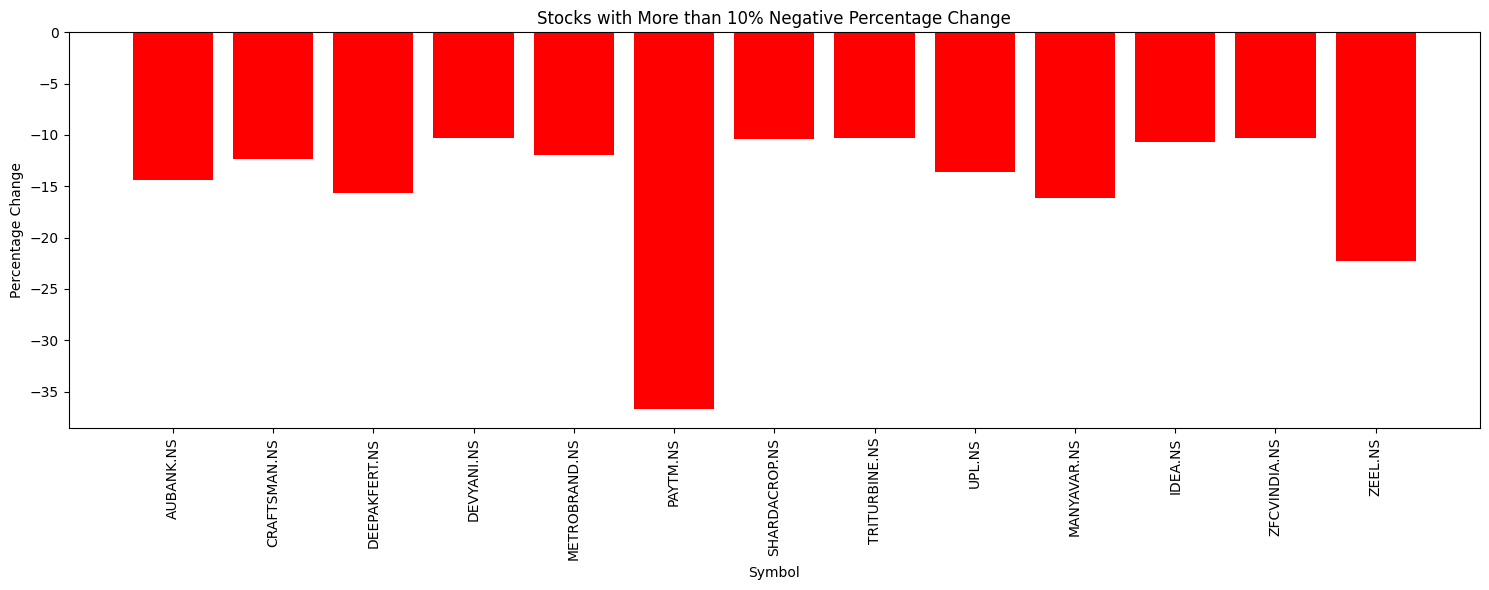

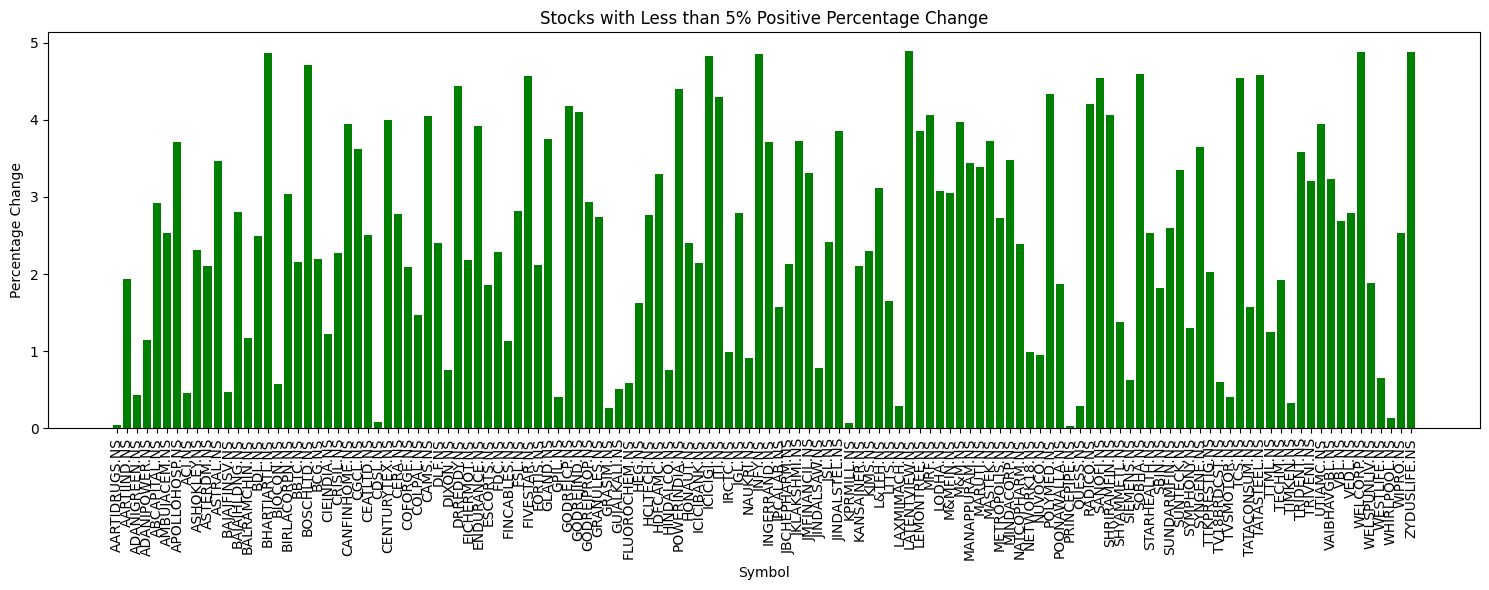

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
positive_df = pd.read_csv('positive_percentage_change.csv')
negative_df = pd.read_csv('negative_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < -10]

# Filter symbols with less than 5% positive percentage change
positive_5_percent_df = positive_df[positive_df['Percentage Change'] < 5]

# Plotting symbols with more than 10% negative percentage change
plt.figure(figsize=(15, 6))
plt.bar(negative_10_percent_df['Symbol'], negative_10_percent_df['Percentage Change'], color='red')
plt.title('Stocks with More than 10% Negative Percentage Change')
plt.xlabel('Symbol')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting symbols with less than 5% positive percentage change
plt.figure(figsize=(15, 6))
plt.bar(positive_5_percent_df['Symbol'], positive_5_percent_df['Percentage Change'], color='green')
plt.title('Stocks with Less than 5% Positive Percentage Change')
plt.xlabel('Symbol')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Read the CSV file
negative_df = pd.read_csv('negative_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < -10]

# Print the list with symbols and their percentage change
print("Symbols with more than 10% negative percentage change:")
for index, row in negative_10_percent_df.iterrows():
    print(f"{row['Symbol']}: {row['Percentage Change']}%")

Symbols with more than 10% negative percentage change:
AUBANK.NS: -14.39091146930771%
CRAFTSMAN.NS: -12.378637293431998%
DEEPAKFERT.NS: -15.662538580461668%
DEVYANI.NS: -10.266105641632626%
METROBRAND.NS: -11.94011428184451%
PAYTM.NS: -36.716167821937134%
SHARDACROP.NS: -10.387520844868837%
TRITURBINE.NS: -10.257834825420025%
UPL.NS: -13.56414443952138%
MANYAVAR.NS: -16.169149163801894%
IDEA.NS: -10.691171473458834%
ZFCVINDIA.NS: -10.281803291042118%
ZEEL.NS: -22.23070050231028%


In [28]:
import pandas as pd

# Read the CSV file
negative_df = pd.read_csv('positive_percentage_change.csv')

# Filter symbols with more than 10% negative percentage change
negative_10_percent_df = negative_df[negative_df['Percentage Change'] < 2]

# Print the list with symbols and their percentage change
print("Symbols with more than 5% positive percentage change:")
for index, row in negative_10_percent_df.iterrows():
    print(f"{row['Symbol']}: {row['Percentage Change']}%")

Symbols with more than 5% positive percentage change:
AARTIDRUGS.NS: 0.0474987391036688%
AARTIIND.NS: 1.9394612226130925%
ADANIGREEN.NS: 0.4350779648172345%
ADANIPOWER.NS: 1.1485735457576969%
ACI.NS: 0.4538335400592848%
BAJAJFINSV.NS: 0.4670820829598534%
BALRAMCHIN.NS: 1.168113370543593%
BIOCON.NS: 0.5799763306974371%
CIEINDIA.NS: 1.2222678718159383%
CDSL.NS: 0.0840961725294102%
COLPAL.NS: 1.463650099461096%
DIXON.NS: 0.758341981430451%
ESCORTS.NS: 1.862210235301202%
FINCABLES.NS: 1.1332625340059268%
GPIL.NS: 0.4104735228657815%
GRASIM.NS: 0.2670615355397815%
GUJALKALI.NS: 0.5045996170081032%
FLUOROCHEM.NS: 0.5863038744096369%
HEG.NS: 1.6242249026804465%
HINDALCO.NS: 0.750373250592502%
IRCTC.NS: 0.9854701175431598%
NAUKRI.NS: 0.9082298363637122%
IPCALAB.NS: 1.571008351197824%
JINDALSAW.NS: 0.7843992059720358%
KPRMILL.NS: 0.0691547974739578%
LTTS.NS: 1.6514392339126815%
LAXMIMACH.NS: 0.2833204691314769%
NETWORK18.NS: 0.9891013999636564%
NUVOCO.NS: 0.9499515970764943%
POONAWALLA.NS: 1.87

## 25 - 44 and 200 MA Scanner

In [11]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Replace 'path/to/formatted_stock_symbols.txt' with the actual path to your text file
nifty50_file_path = './final_small500.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Create lists for strategy signals
cross_above_25_44_list = []  # Stocks where 25-day MA crosses above 44-day MA
cross_above_44_200_list = []  # Stocks where 44-day MA crosses above 200-day MA

# Iterate over each stock symbol
for ticker_symbol in nifty50_symbols:
    try:
        print("Analyzing stock:", ticker_symbol)

        # Create a Ticker object
        ticker = yf.Ticker(ticker_symbol)

        # Set the date range for historical data
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)

        # Get the historical data for the stock within the specified date range
        historical_data = ticker.history(start=start_date, end=end_date)

        # Check if historical data is available for the specified date range
        if historical_data.empty:
            print(f"No historical data available for {ticker_symbol}")
            continue

        # Define base slow and fast moving averages
        fast_ma = 25
        slow_ma_1 = 44
        slow_ma_2 = 200

        # Calculate the moving averages for the strategy
        historical_data['fast_ma'] = historical_data['Close'].rolling(window=fast_ma).mean()
        historical_data['slow_ma_1'] = historical_data['Close'].rolling(window=slow_ma_1).mean()
        historical_data['slow_ma_2'] = historical_data['Close'].rolling(window=slow_ma_2).mean()

        # Create a column with buy and sell signals
        historical_data['signal_25_44'] = np.where(
            (historical_data['fast_ma'] > historical_data['slow_ma_1']) 
            & (historical_data['fast_ma'].shift(1) <= historical_data['slow_ma_1'].shift(1)),
            1.0,
            0.0
        )

        historical_data['signal_44_200'] = np.where(
            (historical_data['slow_ma_1'] > historical_data['slow_ma_2'])
            & (historical_data['slow_ma_1'].shift(1) <= historical_data['slow_ma_2'].shift(1)),
            1.0,
            0.0
        )

        # Append symbols to lists based on signals
        if historical_data['signal_25_44'].iloc[-1] == 1:
            cross_above_25_44_list.append(ticker_symbol)

        if historical_data['signal_44_200'].iloc[-1] == 1:
            cross_above_44_200_list.append(ticker_symbol)

    except Exception as e:
        print(f"Error analyzing {ticker_symbol}: {e}")

# Print or use the created lists as needed
print("Stocks where 25-day MA crosses above 44-day MA:", cross_above_25_44_list)
print("Stocks where 44-day MA crosses above 200-day MA:", cross_above_44_200_list)


Analyzing stock: 360ONE.NS
Analyzing stock: 3MINDIA.NS
Analyzing stock: ABB.NS
Analyzing stock: ACC.NS
Analyzing stock: AIAENG.NS
Analyzing stock: APLAPOLLO.NS
Analyzing stock: AUBANK.NS
Analyzing stock: AARTIDRUGS.NS
Analyzing stock: AARTIIND.NS
Analyzing stock: AAVAS.NS
Analyzing stock: ABBOTINDIA.NS
Analyzing stock: ADANIENSOL.NS
Analyzing stock: ADANIENT.NS
Analyzing stock: ADANIGREEN.NS
Analyzing stock: ADANIPORTS.NS
Analyzing stock: ADANIPOWER.NS
Analyzing stock: ATGL.NS
Analyzing stock: AWL.NS
Analyzing stock: ABCAPITAL.NS
Analyzing stock: ABFRL.NS
Analyzing stock: AEGISCHEM.NS
Analyzing stock: AETHER.NS
Analyzing stock: AFFLE.NS
Analyzing stock: AJANTPHARM.NS
Analyzing stock: APLLTD.NS
Analyzing stock: ALKEM.NS
Analyzing stock: ALKYLAMINE.NS
Analyzing stock: ALLCARGO.NS
Analyzing stock: ALOKINDS.NS
Analyzing stock: ARE&M.NS
Analyzing stock: AMBER.NS
Analyzing stock: AMBUJACEM.NS
Analyzing stock: ANGELONE.NS
Analyzing stock: ANURAS.NS
Analyzing stock: APARINDS.NS
Analyzing stock